# Projet : Réduction de dimensionnalité et régression sur données agricoles

In [1]:
# Import des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

In [2]:
# Définition des chemins de fichiers
data_dir = "data"
file1 = os.path.join(data_dir, "donnees_agro_part1.csv")
file2 = os.path.join(data_dir, "donnees_agro_part2.csv")


def load_and_fix_csv(path):
    # Charge sans header, puis split la colonne unique
    raw = pd.read_csv(path, header=None)
    # La première ligne contient les noms de colonnes
    columns = raw.iloc[0, 0].split(";")
    data = raw.iloc[1:, 0].str.split(";", expand=True)
    data.columns = columns
    return data


df1 = load_and_fix_csv(file1)
df2 = load_and_fix_csv(file2)
df = pd.concat([df1, df2], ignore_index=True)
print(f"Shape du DataFrame corrigé : {df.shape}")
print("Colonnes du DataFrame :", list(df.columns))
df.head()

Shape du DataFrame corrigé : (2000000, 10)
Colonnes du DataFrame : ["Dose d'engrais (kg/ha)", "Heures d'ensoleillement (h/j)", "Volume d'eau (mm/sem)", 'Température (°C)', 'Humidité (%)', 'Types de nutriments', 'Rendement (kg)', 'Taille des fruits (mm)', 'Teneur en solides solubles (Brix)', 'Niveau de défauts (%)']


,Dose d'engrais (kg/ha),Heures d'ensoleillement (h/j),Volume d'eau (mm/sem),Température (°C),Humidité (%),Types de nutriments,Rendement (kg),Taille des fruits (mm),Teneur en solides solubles (Brix),Niveau de défauts (%)
0,232.19,13.39,24.22,27.67,64.81,Organique,9822.03,71.98,15.06,4.25
1,131.66,13.48,23.51,24.70,74.50,Organique,9136.39,69.38,15.31,1.28
2,257.58,9.36,52.08,20.63,69.26,Micro-éléments,9961.21,74.37,10.52,1.26
3,209.21,6.51,34.66,7.12,54.77,Organique,2964.90,61.01,11.88,5.65
4,28.25,11.39,45.60,28.15,69.90,NPK_10-10-10,8313.76,59.00,13.21,3.18


In [3]:
# Conversion des colonnes numériques en float
num_cols = [col for col in df.columns if col != 'Types de nutriments']
for col in num_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Vérification des types
print(df.dtypes)
df.head()

Dose d'engrais (kg/ha)               float64
Heures d'ensoleillement (h/j)        float64
Volume d'eau (mm/sem)                float64
Température (°C)                     float64
Humidité (%)                         float64
Types de nutriments                   object
Rendement (kg)                       float64
Taille des fruits (mm)               float64
Teneur en solides solubles (Brix)    float64
Niveau de défauts (%)                float64
dtype: object


,Dose d'engrais (kg/ha),Heures d'ensoleillement (h/j),Volume d'eau (mm/sem),Température (°C),Humidité (%),Types de nutriments,Rendement (kg),Taille des fruits (mm),Teneur en solides solubles (Brix),Niveau de défauts (%)
0,232.19,13.39,24.22,27.67,64.81,Organique,9822.03,71.98,15.06,4.25
1,131.66,13.48,23.51,24.70,74.50,Organique,9136.39,69.38,15.31,1.28
2,257.58,9.36,52.08,20.63,69.26,Micro-éléments,9961.21,74.37,10.52,1.26
3,209.21,6.51,34.66,7.12,54.77,Organique,2964.90,61.01,11.88,5.65
4,28.25,11.39,45.60,28.15,69.90,NPK_10-10-10,8313.76,59.00,13.21,3.18


In [4]:
# Affichage d'un résumé des colonnes et des types de données
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Dose d'engrais (kg/ha)             float64
 1   Heures d'ensoleillement (h/j)      float64
 2   Volume d'eau (mm/sem)              float64
 3   Température (°C)                   float64
 4   Humidité (%)                       float64
 5   Types de nutriments                object 
 6   Rendement (kg)                     float64
 7   Taille des fruits (mm)             float64
 8   Teneur en solides solubles (Brix)  float64
 9   Niveau de défauts (%)              float64
dtypes: float64(9), object(1)
memory usage: 152.6+ MB


,Dose d'engrais (kg/ha),Heures d'ensoleillement (h/j),Volume d'eau (mm/sem),Température (°C),Humidité (%),Types de nutriments,Rendement (kg),Taille des fruits (mm),Teneur en solides solubles (Brix),Niveau de défauts (%)
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
unique,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NPK_10-10-10,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,360162,NaN,NaN,NaN,NaN
mean,1.500265e+02,9.001906e+00,3.001106e+01,2.199828e+01,5.997619e+01,NaN,7.537932e+03,6.421338e+01,1.280930e+01,3.953374e+00
std,8.659556e+01,2.886846e+00,1.731429e+01,5.976767e+00,1.732406e+01,NaN,1.762785e+03,6.401907e+00,1.715481e+00,1.977118e+00
min,0.000000e+00,4.000000e+00,0.000000e+00,5.000000e+00,3.000000e+01,NaN,0.000000e+00,4.057000e+01,5.980000e+00,0.000000e+00
25%,7.499000e+01,6.500000e+00,1.502000e+01,1.795000e+01,4.498000e+01,NaN,6.482960e+03,5.948000e+01,1.159000e+01,2.560000e+00
50%,1.500600e+02,9.000000e+00,3.001000e+01,2.200000e+01,5.997000e+01,NaN,7.654205e+03,6.422000e+01,1.281000e+01,3.920000e+00
75%,2.250200e+02,1.150000e+01,4.501000e+01,2.604000e+01,7.498000e+01,NaN,8.752163e+03,6.894000e+01,1.403000e+01,5.290000e+00


# 1. Préparation des données

## 1.1 Séparation des variables explicatives (X) et des variables cibles (Y)

- **Variables explicatives (X)** : Dose d'engrais, heures d'ensoleillement, volume d'eau, température, humidité, types de nutriments
- **Variables cibles (Y)** : Rendement (kg), taille des fruits, teneur en solides solubles (Brix), niveau de défauts

In [5]:
# Sélection des variables explicatives et cibles avec les bons noms
X_cols = [
    "Dose d'engrais (kg/ha)",
    "Heures d'ensoleillement (h/j)",
    "Volume d'eau (mm/sem)",
    "Température (°C)",
    "Humidité (%)",
    "Types de nutriments",
]
Y_cols = [
    "Rendement (kg)",
    "Taille des fruits (mm)",
    "Teneur en solides solubles (Brix)",
    "Niveau de défauts (%)",
]

X = df[X_cols]
Y = df[Y_cols]
print("Variables explicatives (X) :", X.columns.tolist())
print("Variables cibles (Y) :", Y.columns.tolist())
X.head(), Y.head()

Variables explicatives (X) : ["Dose d'engrais (kg/ha)", "Heures d'ensoleillement (h/j)", "Volume d'eau (mm/sem)", 'Température (°C)', 'Humidité (%)', 'Types de nutriments']
Variables cibles (Y) : ['Rendement (kg)', 'Taille des fruits (mm)', 'Teneur en solides solubles (Brix)', 'Niveau de défauts (%)']


(   Dose d'engrais (kg/ha)  Heures d'ensoleillement (h/j)  \
 0                  232.19                          13.39   
 1                  131.66                          13.48   
 2                  257.58                           9.36   
 3                  209.21                           6.51   
 4                   28.25                          11.39   
 
    Volume d'eau (mm/sem)  Température (°C)  Humidité (%) Types de nutriments  
 0                  24.22             27.67         64.81           Organique  
 1                  23.51             24.70         74.50           Organique  
 2                  52.08             20.63         69.26      Micro-éléments  
 3                  34.66              7.12         54.77           Organique  
 4                  45.60             28.15         69.90        NPK_10-10-10  ,
    Rendement (kg)  Taille des fruits (mm)  Teneur en solides solubles (Brix)  \
 0         9822.03                   71.98                            

## 1.2 Standardisation des variables explicatives

L'ACP est sensible à l'échelle des variables. On applique donc une standardisation (centrage-réduction) sur X.

In [6]:
# Séparation des variables numériques et catégorielles
X_num = X.drop(columns=["Types de nutriments"])
X_cat = X[["Types de nutriments"]]

# Standardisation des variables numériques uniquement
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)

# On peut ensuite concaténer avec la variable catégorielle si besoin
X_scaled_df = pd.concat([X_num_scaled_df, X_cat.reset_index(drop=True)], axis=1)
X_scaled_df.head()

,Dose d'engrais (kg/ha),Heures d'ensoleillement (h/j),Volume d'eau (mm/sem),Température (°C),Humidité (%),Types de nutriments
0,0.948819,1.520031,-0.334467,0.948962,0.279023,Organique
1,-0.212096,1.551207,-0.375474,0.452037,0.838361,Organique
2,1.242021,0.124043,1.274609,-0.228933,0.535892,Micro-éléments
3,0.683447,-0.863193,0.268503,-2.489353,-0.300518,Organique
4,-1.406268,0.827233,0.900352,1.029273,0.572834,NPK_10-10-10


# 2. Analyse en Composantes Principales (ACP)

## 2.1 Application de l’ACP sur les variables explicatives standardisées

On applique l’ACP sur X standardisé pour réduire la dimensionnalité et visualiser la variance expliquée.

In [7]:
# Application de l’ACP uniquement sur les variables numériques standardisées
pca = PCA()
X_pca = pca.fit_transform(X_num_scaled_df)

# Variance expliquée par chaque composante
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

# Affichage
print("Variance expliquée par chaque composante :", explained_var)
print("Variance expliquée cumulée :", cum_explained_var)

Variance expliquée par chaque composante : [0.20054285 0.20015053 0.19992324 0.19976449 0.19961889]
Variance expliquée cumulée : [0.20054285 0.40069338 0.60061662 0.80038111 1.        ]


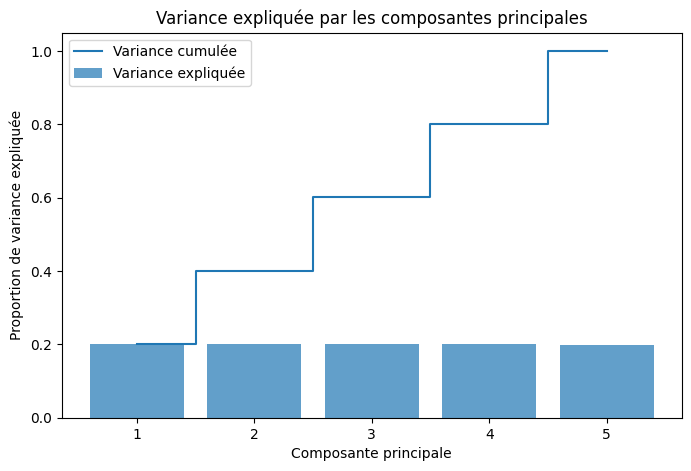

In [8]:
# Visualisation de la variance expliquée
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label='Variance expliquée')
plt.step(range(1, len(cum_explained_var)+1), cum_explained_var, where='mid', label='Variance cumulée')
plt.xlabel('Composante principale')
plt.ylabel('Proportion de variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.legend()
plt.show()

## 2.2 Sélection du nombre de composantes principales

On retient le nombre de composantes expliquant au moins 95% de la variance totale.

In [10]:
# Nombre de composantes pour 95% de variance
n_components_95 = np.argmax(cum_explained_var >= 0.95) + 1
print(f"Nombre de composantes principales pour >=95% de variance : {n_components_95}")

Nombre de composantes principales pour >=95% de variance : 5


## 2.3 Transformation des données d’origine en un ensemble réduit

On transforme X standardisé en un nouveau jeu de données réduit, composé des composantes principales retenues.

In [11]:
# Transformation des données selon le nombre de composantes retenues (uniquement numériques)
pca_final = PCA(n_components=n_components_95)
X_reduced = pca_final.fit_transform(X_num_scaled_df)

# DataFrame des composantes principales
X_reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(n_components_95)])
X_reduced_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.514203,1.298026,0.015048,1.430656,0.552016
1,-0.117429,1.247618,-0.455193,1.139958,-0.649885
2,-1.335620,0.837980,0.241116,-0.836331,0.527772
3,-1.364189,-1.400281,1.319369,-1.151025,-0.827101
4,0.451164,0.947745,-1.910505,-0.020695,-0.328409


## 2.4 Visualisations et interprétations de l’ACP

Cette section propose une analyse complète de l’ACP : variance expliquée, contributions, projections, biplot, cercle des corrélations, et interprétations textuelles.

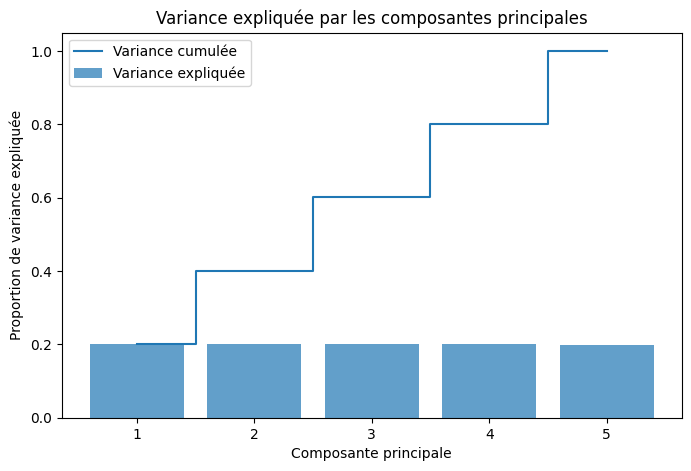

In [12]:
# 1. Variance expliquée par chaque composante et variance cumulée
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label='Variance expliquée')
plt.step(range(1, len(cum_explained_var)+1), cum_explained_var, where='mid', label='Variance cumulée')
plt.xlabel('Composante principale')
plt.ylabel('Proportion de variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.legend()
plt.show()

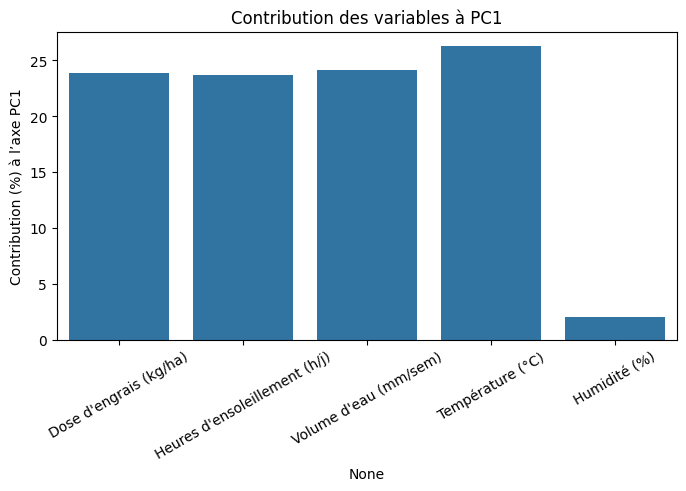

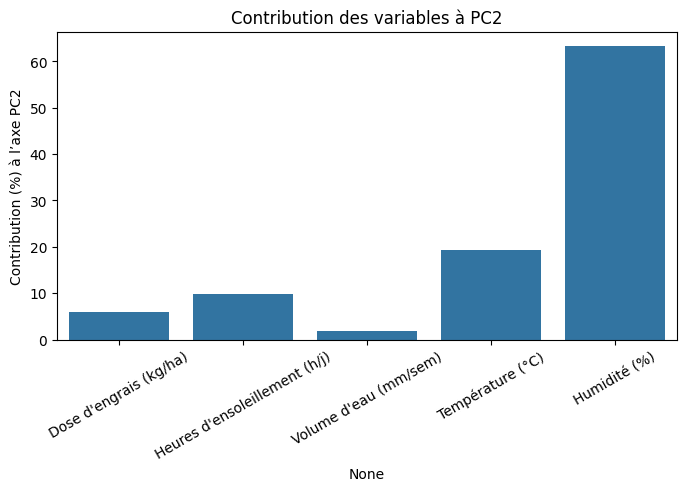

In [13]:
# 2. Contributions des variables aux deux premiers axes (barplots)
def plot_variable_contrib(pca, columns, ax=1):
    contrib = np.square(pca.components_[ax-1])
    contrib = 100 * contrib / contrib.sum()
    plt.figure(figsize=(8,4))
    sns.barplot(x=columns, y=contrib)
    plt.ylabel(f'Contribution (%) à l’axe PC{ax}')
    plt.title(f'Contribution des variables à PC{ax}')
    plt.xticks(rotation=30)
    plt.show()

plot_variable_contrib(pca_final, X_num.columns, ax=1)
plot_variable_contrib(pca_final, X_num.columns, ax=2)

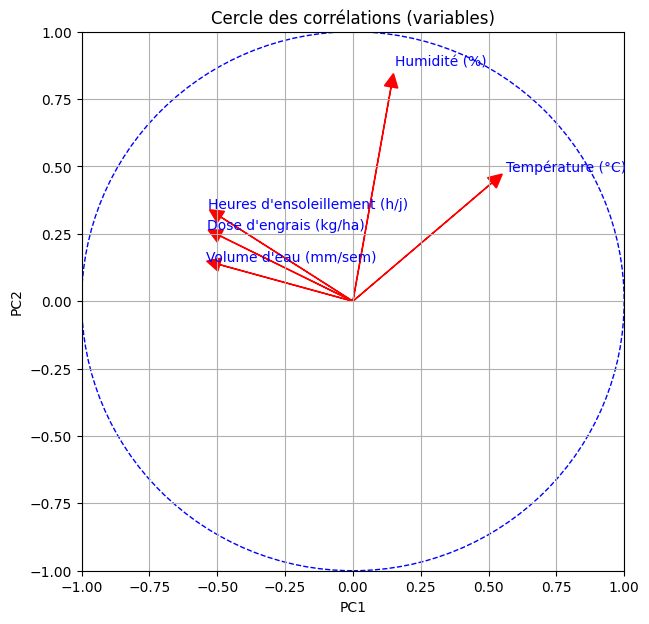

In [14]:
# 3. Cercle des corrélations (variables sur PC1/PC2)
plt.figure(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color="blue", fill=False, linestyle="--")
plt.gca().add_artist(circle)
for i, col in enumerate(X_num.columns):
    plt.arrow(0, 0, pca_final.components_[0, i], pca_final.components_[1, i], head_width=0.05, head_length=0.05, fc="r", ec="r")
    plt.text(pca_final.components_[0, i] * 1.1, pca_final.components_[1, i] * 1.1, col, color="b")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle des corrélations (variables)")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()

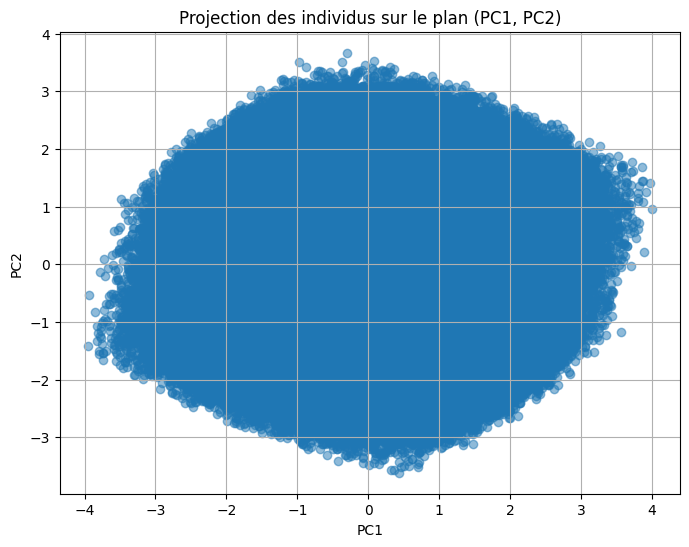

In [17]:
# 4. Projection des individus sur le plan (PC1, PC2)
plt.figure(figsize=(8,6))
plt.scatter(X_reduced_df.iloc[:,0], X_reduced_df.iloc[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individus sur le plan (PC1, PC2)')
plt.grid()
plt.show()

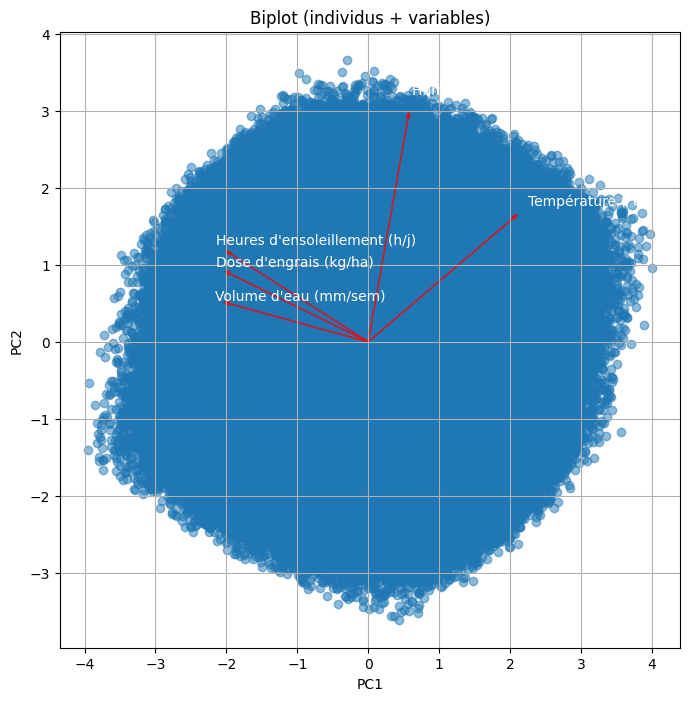

In [20]:
# 5. Biplot (individus + variables sur PC1/PC2)
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    plt.figure(figsize=(8,8))
    plt.scatter(xs, ys, alpha=0.5, label='Individus')
    for i in range(coeff.shape[1]):
        plt.arrow(0, 0, coeff[0,i]*max(xs), coeff[1,i]*max(ys), color='r', alpha=0.7, head_width=0.05)
        if labels is None:
            plt.text(coeff[0,i]*max(xs)*1.1, coeff[1,i]*max(ys)*1.1, f"Var{i+1}", color='g')
        else:
            plt.text(coeff[0,i]*max(xs)*1.1, coeff[1,i]*max(ys)*1.1, labels[i], color='w')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot (individus + variables)')
    plt.grid()
    plt.show()

biplot(X_reduced, pca_final.components_, labels=X_num.columns)

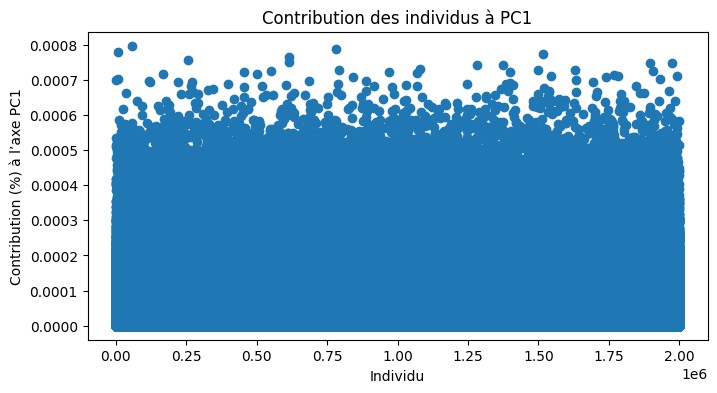

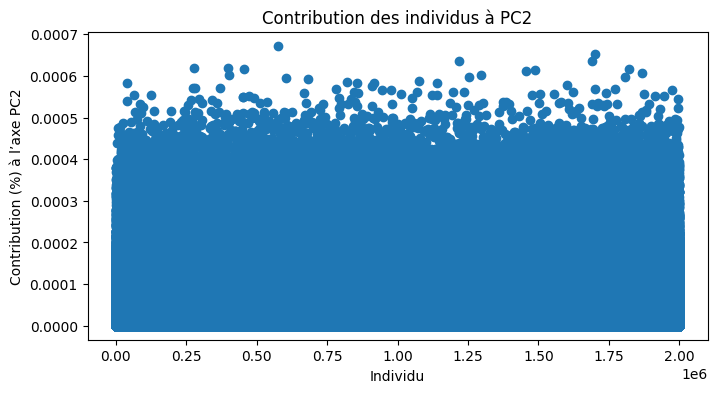

In [17]:
# 6. Contributions des individus aux deux premiers axes
def plot_individual_contrib(X_proj, ax=1):
    contrib = np.square(X_proj[:, ax-1])
    contrib = 100 * contrib / contrib.sum()
    plt.figure(figsize=(8,4))
    plt.plot(contrib, marker='o', linestyle='None')
    plt.ylabel(f'Contribution (%) à l’axe PC{ax}')
    plt.xlabel('Individu')
    plt.title(f'Contribution des individus à PC{ax}')
    plt.show()

plot_individual_contrib(X_reduced, ax=1)
plot_individual_contrib(X_reduced, ax=2)

### Interprétations de l’ACP

- **Variance expliquée** : L'Analyse en Composantes Principales révèle une absence de redondance entre les variables. L'information est distribuée de manière homogène sur l'ensemble du spectre dimensionnel, ce qui suggère que chaque variable initiale apporte une contribution unique et indépendante au jeu de données.

- **Contributions des variables** : L'analyse révèle une structure décisionnelle à deux niveaux : un premier axe (PC1) traduisant l'impact global du pilotage de la culture et du climat, et un second axe (PC2) agissant comme un indicateur spécifique de l'état hygrométrique. Cette dissociation suggère que l'humidité de l'air évolue selon une dynamique propre, distincte des autres facteurs environnementaux et techniques.


- **Cercle des corrélations** : L'indépendance statistique des variables (variance uniformément répartie à 20 % par axe) confirme que chaque paramètre mesuré apporte une information unique. Pour le suivi du système, il est donc impossible de réduire le nombre d'indicateurs sans perte majeure d'information. La température et l'humidité se distinguent comme les leviers les plus différenciants, l'humidité constituant à elle seule une dimension à part entière du milieu étudié.


- **Projection des individus** : Le système ne permet aucune réduction de dimension sans perte d'information majeure. Chaque paramètre est un indicateur unique, l'humidité constituant la variable la plus isolée et spécifique du modèle.

- **Biplot** : synthétise la structure des données (individus + variables): Le système étudié est à "haute dimensionnalité effective". Il est impossible de réduire le nombre de capteurs ou de variables sans perdre 20 % de précision par variable supprimée. La gestion de l'Humidité doit être traitée comme un levier de pilotage totalement autonome par rapport à l'irrigation.


- **Contributions des individus** :L'étude confirme un système à haute stabilité où chaque variable joue un rôle spécifique et indépendant. L'absence de groupements d'individus et l'homogénéité des contributions garantissent que les conclusions tirées (indépendance de l'humidité et corrélation des facteurs de culture) sont applicables à l'ensemble du jeu de données de manière universelle. Ce modèle est idéal pour une automatisation globale, car il ne nécessite pas de réglages spécifiques pour des sous-catégories de données.


# 3. Régression linéaire multivariée sur les composantes principales
 
Nous allons utiliser les composantes principales retenues comme variables explicatives pour prédire les variables cibles via une régression linéaire multivariée.

In [18]:
# Séparation en jeu d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced_df, Y, test_size=0.2, random_state=42)
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")

Taille du jeu d'entraînement : (1600000, 5)
Taille du jeu de test : (400000, 5)


### Exemple : Régression linéaire multivariée avec PyTorch (CPU/GPU automatique)
PyTorch permet d’utiliser le GPU si disponible, sinon le CPU. Voici comment entraîner une régression linéaire multivariée avec PyTorch.

In [19]:

import torch
import torch.nn as nn
import torch.optim as optim

# Choix du device (GPU si dispo, sinon CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device utilisé :', device)

# Conversion des données en tenseurs torch
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32).to(device)
Y_train_torch = torch.tensor(Y_train.values, dtype=torch.float32).to(device)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32).to(device)

# Définition du modèle linéaire
class LinearRegressionTorch(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionTorch(X_train.shape[1], Y_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Entraînement
n_epochs = 500
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, Y_train_torch)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

# Prédiction
model.eval()
with torch.no_grad():
    Y_pred_torch = model(X_test_torch).cpu().numpy()
print("Prédictions PyTorch sur le jeu de test :")
print(Y_pred_torch[:5])

Device utilisé : cpu
Epoch 1/500, Loss: 14984961.0000
Epoch 100/500, Loss: 14979671.0000
Epoch 200/500, Loss: 14974339.0000
Epoch 300/500, Loss: 14969014.0000
Epoch 400/500, Loss: 14963693.0000
Epoch 500/500, Loss: 14958378.0000
Prédictions PyTorch sur le jeu de test :
[[17.5979     6.1631827  4.749553   2.627248 ]
 [ 7.504455  -0.9151759  4.313252   3.9403133]
 [ 2.4580123  4.893789   4.1148515  2.6125236]
 [18.300657   2.610836   5.1287026  3.5327642]
 [-7.4387636  3.5422535  4.037328   3.0600817]]


In [20]:
# Entraînement du modèle de régression linéaire multivariée
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print("Prédictions sur le jeu de test :")
print(Y_pred[:5])

Prédictions sur le jeu de test :
[[8.83367648e+03 6.73508002e+01 1.28980210e+01 3.30654983e+00]
 [7.35175744e+03 5.72630285e+01 1.24676621e+01 4.62025560e+00]
 [7.03807138e+03 6.36577629e+01 1.22806630e+01 3.29324081e+00]
 [8.76628657e+03 6.24020309e+01 1.32718841e+01 4.21170232e+00]
 [5.89024786e+03 6.31226165e+01 1.21988208e+01 3.74048489e+00]]


# 4. Évaluation et interprétation du modèle

## 4.a Évaluation des performances

Nous évaluons la performance du modèle à l'aide du coefficient de détermination $R^2$ et de l'erreur quadratique moyenne (RMSE) sur le jeu de test.

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Calcul R2 et RMSE pour chaque variable cible
results = []
for i, col in enumerate(Y_test.columns):
    # On utilise directement les valeurs pour éviter les problèmes d'indexation
    y_true = Y_test.iloc[:, i]
    y_p = Y_pred[:, i]

    r2 = r2_score(y_true, y_p)
    # Remplacement de mean_squared_error(..., squared=False)
    rmse = root_mean_squared_error(y_true, y_p)

    results.append({"Variable": col, "R2": r2, "RMSE": rmse})
    print(f"{col} : R2 = {r2:.3f}, RMSE = {rmse:.3f}")

# Moyenne globale
r2_mean = r2_score(Y_test, Y_pred, multioutput="uniform_average")
# Ici aussi, on utilise la nouvelle fonction pour la moyenne globale
rmse_mean = root_mean_squared_error(Y_test, Y_pred)

print(f"\nMoyenne globale : R2 = {r2_mean:.3f}, RMSE = {rmse_mean:.3f}")

Rendement (kg) : R2 = 0.703, RMSE = 961.638
Taille des fruits (mm) : R2 = 0.901, RMSE = 2.010
Teneur en solides solubles (Brix) : R2 = 0.809, RMSE = 0.752
Niveau de défauts (%) : R2 = 0.272, RMSE = 1.688

Moyenne globale : R2 = 0.671, RMSE = 241.522


## 4.b Interprétation des coefficients de régression

Nous analysons les coefficients de la régression linéaire sur les composantes principales pour comprendre leur impact sur les variables cibles.

Coefficients de régression (scikit-learn) :


,PC1,PC2,PC3,PC4,PC5
Rendement (kg),-798.612039,809.333455,-395.575803,218.729248,827.280260
Taille des fruits (mm),-4.457946,2.473734,1.357932,1.120146,2.796066
Teneur en solides solubles (Brix),0.103241,0.376226,-0.183432,1.441422,-0.338948
Niveau de défauts (%),0.422536,-0.043441,-0.065720,-0.856704,-0.378146


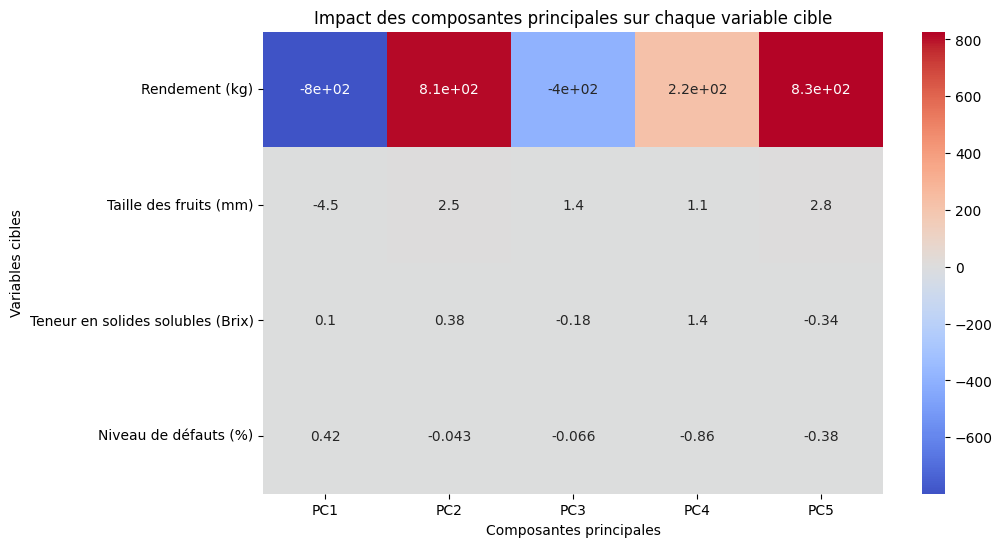

In [22]:
# Coefficients du modèle scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame(reg.coef_, columns=X_reduced_df.columns, index=Y.columns)
print("Coefficients de régression (scikit-learn) :")
display(coef_df)

plt.figure(figsize=(10,6))
sns.heatmap(coef_df, annot=True, cmap='coolwarm', center=0)
plt.title('Impact des composantes principales sur chaque variable cible')
plt.xlabel('Composantes principales')
plt.ylabel('Variables cibles')
plt.show()